# analysis

Here, we want to compare the processing produced by the js code with the one by the python code.

In [1]:
from nbimports import *

In [2]:
filename = "../data/user/data_26042022_182920.csv"

In [3]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [4]:
data.head()

,source,data
0,/data,"{""sample_key"":""223155_50"",""timestamp0"":223155,..."
1,/data,"{""sample_key"":""223168_60"",""timestamp0"":223168,..."
2,/data,"{""sample_key"":""223181_70"",""timestamp0"":223181,..."
3,/data,"{""sample_key"":""223181_80"",""timestamp0"":223181,..."
4,/data,"{""sample_key"":""223194_90"",""timestamp0"":223194,..."


## get all individual segments

In [6]:
import processing

In [7]:
data_df = processing.format_data(select(data, source='/data'))

In [8]:
feat_df = processing.format_feat(select(data, source='/feat'))

In [9]:
data_df.head()

,key,t0,ts,stroke_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,p1
0,223155_50,223155,50,7,0.108465,0.922634,0.016437,-0.000808,0.000759,0.012175,-0.000011,0.000010,0.000634,-0.000005,0.000004,0.000210
1,223168_60,223168,60,7,0.107795,0.923251,0.019668,-0.001477,0.001376,0.015406,-0.000035,0.000032,0.001471,-0.000012,0.000011,0.000431
2,223181_70,223181,70,7,0.107020,0.923929,0.022609,-0.002252,0.002054,0.018348,-0.000086,0.000079,0.002857,-0.000027,0.000025,0.000760
3,223181_80,223181,80,7,0.106651,0.924164,0.022216,-0.002621,0.002289,0.017955,-0.000183,0.000169,0.004819,-0.000053,0.000049,0.001180
4,223194_90,223194,90,7,0.105952,0.924211,0.021473,-0.003320,0.002336,0.017212,-0.000349,0.000322,0.007260,-0.000094,0.000086,0.001638


In [10]:
feat_df.head()

,key,segment_id,s,da,min_dtw,min_dtw_id
0,223155_50,1,0.000063,-0.001177,10000.0,0
1,223168_60,1,0.000164,-0.001177,10000.0,0
2,223181_70,1,0.000366,-0.001177,10000.0,0
3,223181_80,1,0.000719,0.001078,10000.0,0
4,223194_90,1,0.001273,0.005042,10000.0,0


In [11]:
segment_ids = list(set(feat_df['segment_id']))

In [12]:
segments = []
for i, grp in feat_df.groupby('segment_id'):
    gi = grp.join(data_df.set_index('key'), on='key').copy()
    segments.append(gi)

In [13]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [14]:
def plot_one_segment(i):
    fig, ax = plt.subplots()
    segments[i].plot(x='ts', y='s', ax=ax)
    segments[i].plot(x='ts', y='da', ax=ax)

In [15]:
interact(plot_one_segment, i=widgets.IntSlider(min=segment_ids[0], max=segment_ids[-1], step=1, value=segment_ids[0]));

interactive(children=(IntSlider(value=1, description='i', max=354, min=1), Output()), _dom_classes=('widget-in…

In [16]:
da = np.unwrap(segments[1]['da'].values, period=1.1)

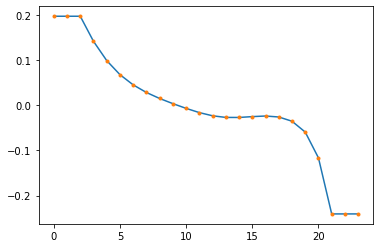

In [17]:
plt.plot(da)
plt.plot(da, '.')

## embedding

In [20]:
import clusterisation

In [21]:
sm_seg = clusterisation.compute_similarity_matrix(segments)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  35 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 5128 tasks      | elapsed:    3.7s
[Parallel(n_jobs=8)]: Done 21128 tasks      | elapsed:   10.5s
[Parallel(n_jobs=8)]: Done 43528 tasks      | elapsed:   19.8s
[Parallel(n_jobs=8)]: Done 61410 out of 61425 | elapsed:   26.9s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 61425 out of 61425 | elapsed:   26.9s finished


In [22]:
emb_seg = clusterisation.tsne_embed(sm_seg, perplexity=10) 

/home/antoine/Documents/research/rto_nime22/notebooks/tsne_helper.py:76: RuntimeWarning: divide by zero encountered in log2
  res = - (a * np.log2(a)).sum()
/home/antoine/Documents/research/rto_nime22/notebooks/tsne_helper.py:76: RuntimeWarning: invalid value encountered in multiply
  res = - (a * np.log2(a)).sum()
/home/antoine/Documents/research/rto_nime22/notebooks/tsne_helper.py:69: RuntimeWarning: invalid value encountered in true_divide
  return a/b
/home/antoine/anaconda3/envs/rto_nime22/lib/python3.7/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
/home/antoine/anaconda3/envs/rto_nime22/lib/python3.7/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
/home/antoine/anaconda3/envs/rto_nime22/lib/python3.7/site-pac

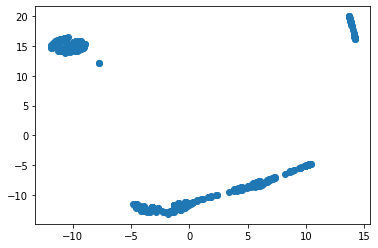

In [23]:
plt.scatter(emb_seg[:, 0], emb_seg[:, 1])

# compare with python code for feature extraction

In [24]:
processing = reload(processing)

In [25]:
fe = processing.FeatureExtractor()

In [26]:
data_df.head()

,key,t0,ts,stroke_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,p1
0,223155_50,223155,50,7,0.108465,0.922634,0.016437,-0.000808,0.000759,0.012175,-0.000011,0.000010,0.000634,-0.000005,0.000004,0.000210
1,223168_60,223168,60,7,0.107795,0.923251,0.019668,-0.001477,0.001376,0.015406,-0.000035,0.000032,0.001471,-0.000012,0.000011,0.000431
2,223181_70,223181,70,7,0.107020,0.923929,0.022609,-0.002252,0.002054,0.018348,-0.000086,0.000079,0.002857,-0.000027,0.000025,0.000760
3,223181_80,223181,80,7,0.106651,0.924164,0.022216,-0.002621,0.002289,0.017955,-0.000183,0.000169,0.004819,-0.000053,0.000049,0.001180
4,223194_90,223194,90,7,0.105952,0.924211,0.021473,-0.003320,0.002336,0.017212,-0.000349,0.000322,0.007260,-0.000094,0.000086,0.001638


In [27]:
for i , stroke in data_df.groupby("stroke_id"):
    sample = stroke[['ts', 'x0', 'y0']]
    sample.columns = ['t', 'x', 'y']
    feat = fe(sample)
    break

In [28]:
segmenter = processing.SegmentNp()

In [29]:
segments = segmenter(feat.values)

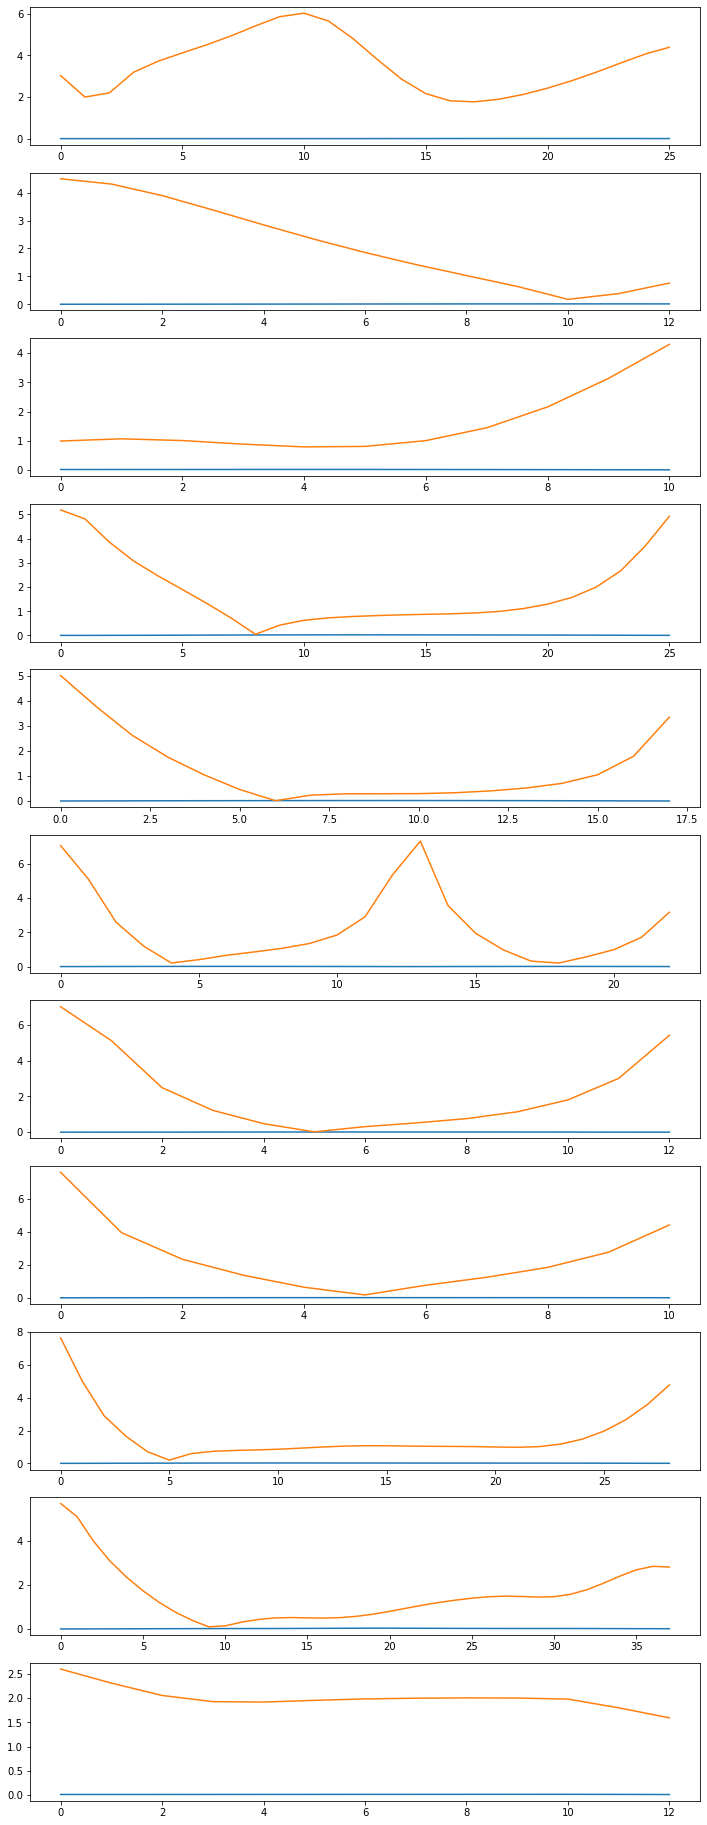

In [35]:
n_segments = len(segments)

fig, ax = plt.subplots(n_segments, 1, figsize=(12, 3*n_segments))

for i, segment in enumerate(segments):
    ax[i].plot(segment[:, 1])
    ax[i].plot(segment[:, 0])